## Reviews and Ratings

In [ ]:
import urllib
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

In [ ]:
# Link to the website

init = "https://www.bankbazaar.com/reviews/axis-bank/all-products.html?reviewPageNumber="

In [ ]:
# Number of pages to extract

number_of_pages = 50

### REVIEWS

In [ ]:
list1 = []
for x in range (1,number_of_pages+1):
  req = urllib.request.Request(url = init+str(x), headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"})
  doc = urllib.request.urlopen(req)
  file = doc.read().decode('utf-8')
  bsObj = BeautifulSoup(file)
  reviews_list = bsObj.find_all(name="div",attrs = {"class": "text_here review-desc-more"})
  res = [rev.text.strip() for rev in reviews_list]
  list1.extend(res)
  time.sleep(3)

In [ ]:
list1[0]

'Through showroom got suggestion to take a car loan from AXIS bank. I taken this loan on 3 years back. I got the loan amount of 4L with tenure period of 4 years. The rate of interest was okay. I done the down payment of around 1.5L. EMI need to pay of 10,500 rupees. The car model is Swift Dzire. I taken for commercial purpose based on amount which I get on monthly doing the EMI payment.'

In [ ]:
len(list1)

1000

### RATINGS

In [ ]:
list2 = []
for x in range(1,number_of_pages+1):
  req = urllib.request.Request(url = init+str(x), headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"})
  doc = urllib.request.urlopen(req)
  file = doc.read().decode('utf-8')
  bsObj = BeautifulSoup(file)
  ratings_list = bsObj.find_all(name="div",attrs = {"class": "rating-section review-user-score"})
  rating1 = [rating.text.strip() for rating in ratings_list]
  rating4 = [re.findall("[0-9.]+(?=/)", yy)[0] for yy in rating1]
  list2.extend(rating4)
  time.sleep(3)

In [ ]:
list2[0]

'4.0'

In [ ]:
len(list2)

1000

### DataFrame

In [ ]:
df = pd.DataFrame(list(zip(list1, list2)),
               columns =['Reviews', 'Ratings'], index = range(1,1001))

In [ ]:
df.head()

,Reviews,Ratings
1,Through showroom got suggestion to take a car ...,4.0
2,I have been using AXIS bank credit card for 3 ...,4.0
3,I am using Axis bank saving account for the p...,5.0
4,Axis Bank has offered a personal loan and the...,5.0
5,"This is Axis Bank Flip card, actually i am get...",5.0


In [ ]:
df.shape

(1000, 2)

In [ ]:
df['Ratings'] = df['Ratings'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Reviews  1000 non-null   object 
 1   Ratings  1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


## WORDCLOUD

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
wc = WordCloud(max_words = 200, regexp = "[A-z]+", width = 800, height = 400, stopwords = STOPWORDS, random_state = 40)

In [ ]:
only_reviews = ' '.join(df['Reviews'])

In [ ]:
len(only_reviews)

316378

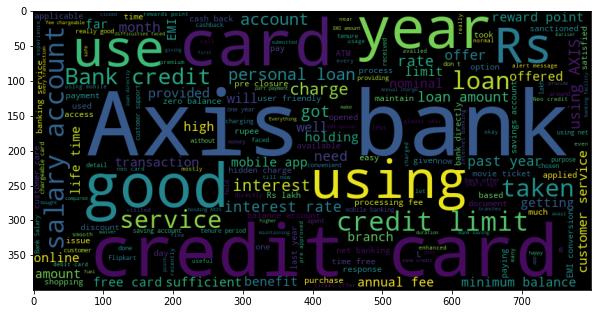

In [ ]:
# Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(only_reviews))
plt.show()

In [ ]:
only_reviews_positive = ' '.join(df[df['Ratings']>=4.0]['Reviews'])
only_reviews_negative = ' '.join(df[df['Ratings']<4.0]['Reviews'])

### Positive Reviews

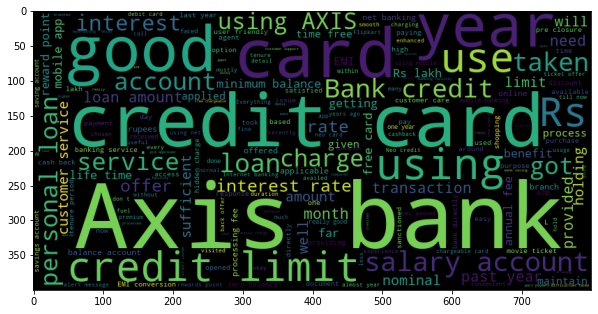

In [ ]:
# Positive Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(only_reviews_positive))
plt.show()

In [ ]:
positive_reviews_tokens = re.findall("[A-z']+", only_reviews_positive)

In [ ]:
positive = ' '.join(positive_reviews_tokens)

In [ ]:
len(positive)

252130

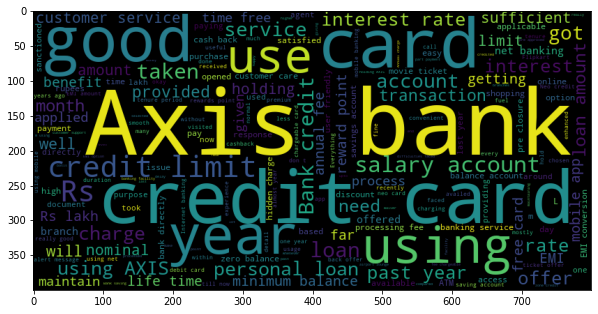

In [ ]:
# Positive Review Tokens WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(positive))
plt.show()

In [ ]:
# Removing Stopwords from Positve Reviews

positive_reviews_tokens_no_stopwords = [x for x in positive_reviews_tokens if x not in STOPWORDS]

In [ ]:
positive_w_o_stopwords = ' '.join(positive_reviews_tokens_no_stopwords)

In [ ]:
len(positive_w_o_stopwords)

175353

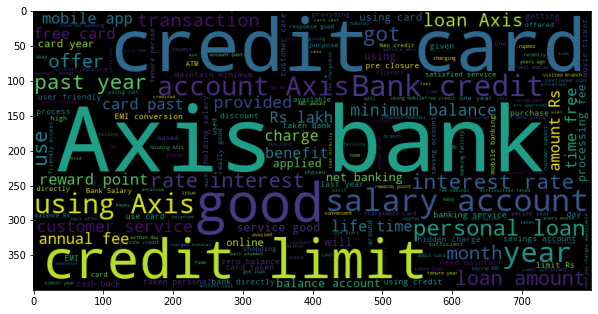

In [ ]:
# Positive Reviews w/o Stopwords WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(positive_w_o_stopwords))
plt.show()

In [ ]:
from collections import Counter

In [ ]:
C = Counter(positive_reviews_tokens_no_stopwords)

In [ ]:
top_200_words_positive = {k:v for k,v in C.most_common(200)}

In [ ]:
len(top_200_words_positive)

200

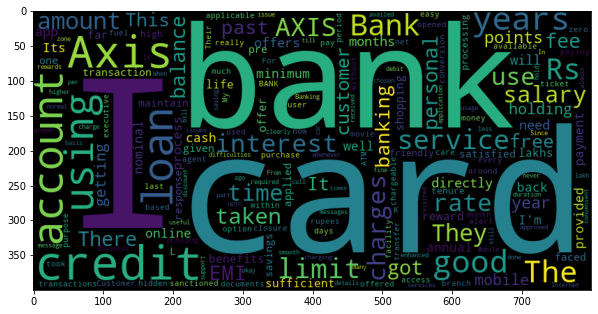

In [ ]:
# Top 200 Positive Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_frequencies(top_200_words_positive))
plt.show()

### Negative Reviews

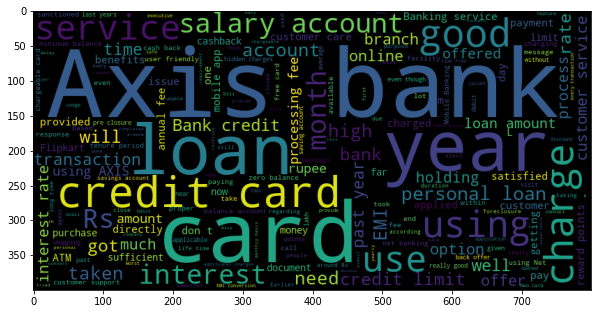

In [ ]:
# Negative Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(only_reviews_negative))
plt.show()

In [ ]:
negative_reviews_tokens = re.findall("[A-z]+", only_reviews_negative)

In [ ]:
negative = ' '.join(negative_reviews_tokens)

In [ ]:
len(negative)

51327

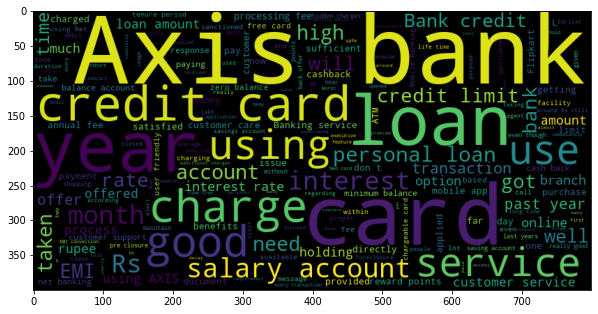

In [ ]:
# Negative Review Tokens WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(negative))
plt.show()

In [ ]:
# Removing Stopwords from Negative Reviews

negative_reviews_tokens_no_stopwords = [x for x in negative_reviews_tokens if x not in STOPWORDS]

In [ ]:
negative_w_o_stopwords = ' '.join(negative_reviews_tokens_no_stopwords)

In [ ]:
len(negative_w_o_stopwords)

35069

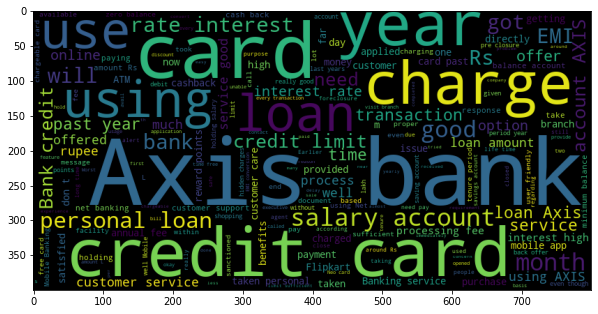

In [ ]:
# Negative Reviews w/o Stopwords WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(negative_w_o_stopwords))
plt.show()

In [ ]:
C1 = Counter(negative_reviews_tokens_no_stopwords)

In [ ]:
top_200_words_negative = {k:v for k,v in C1.most_common(200)}

In [ ]:
len(top_200_words_negative)

200

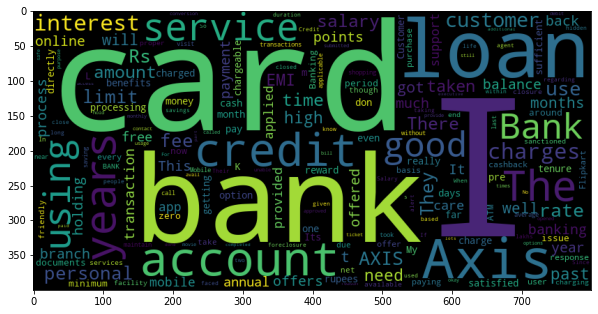

In [ ]:
# Top 200 Negative Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_frequencies(top_200_words_negative))
plt.show()

### Exclusive Positve Words

In [ ]:
exclusive_positive_words = set(top_200_words_positive.keys()) - set(top_200_words_negative.keys())

In [ ]:
len(exclusive_positive_words)

42

In [ ]:
exclusive_positive_words_dictionary = {}
for key in top_200_words_positive.keys():
    if key in exclusive_positive_words:
        exclusive_positive_words_dictionary[key] = top_200_words_positive[key]

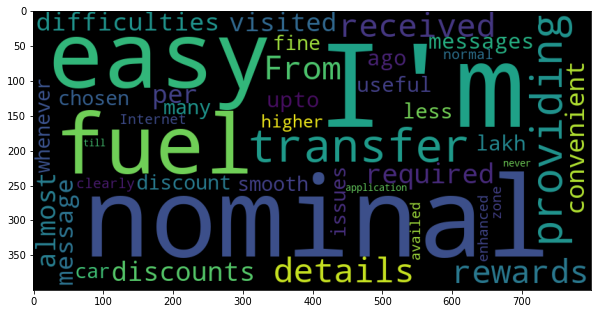

In [ ]:
# Exclusive Positive Words WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_frequencies(exclusive_positive_words_dictionary))
plt.show()

### Exclusive Negative Words

In [ ]:
exclusive_negative_words = set(top_200_words_negative.keys()) - set(top_200_words_positive.keys())

In [ ]:
len(exclusive_negative_words)

42

In [ ]:
exclusive_negative_words_dictionary = {}
for key in top_200_words_negative.keys():
    if key in exclusive_negative_words:
        exclusive_negative_words_dictionary[key] = top_200_words_negative[key]

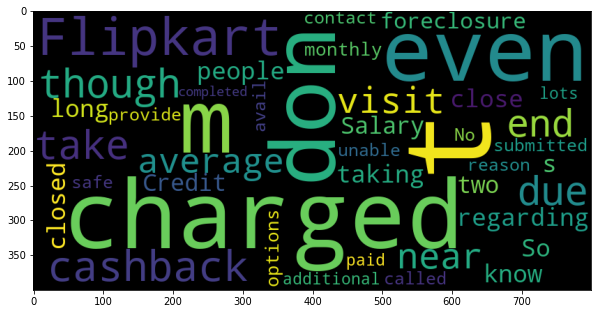

In [129]:
# Exclusive Negative Words WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_frequencies(exclusive_negative_words_dictionary))
plt.show()